 Heatmap heatmap.png olarak kaydedildi.


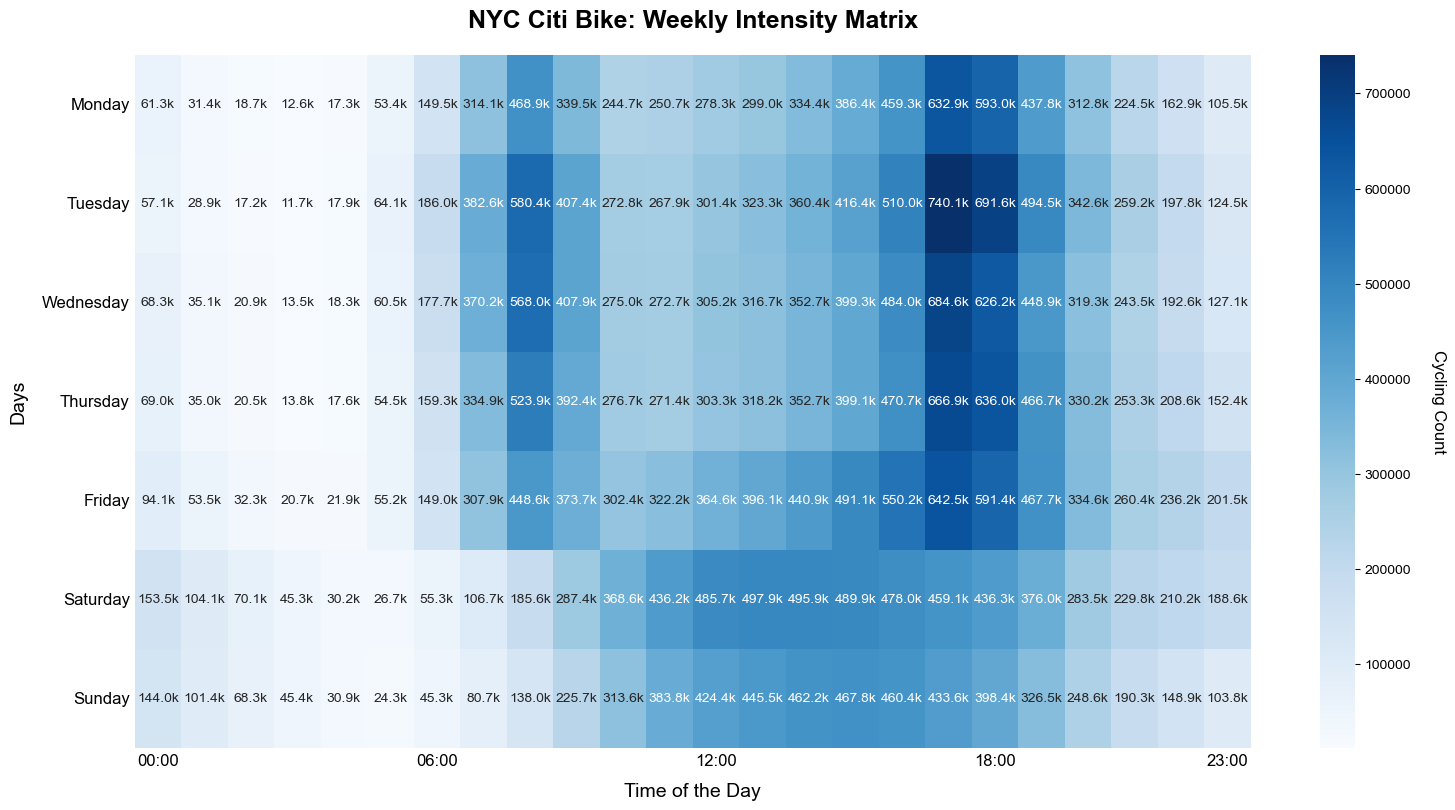

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. VERİYİ OKU 
df_heat = pd.read_csv("hourly_patterns.csv")

# Veriyi tablo haline getiriyoruz
heatmap_data = df_heat.pivot(index='Day_of_Week', columns='Hour', values='Trip_Count')

# Günleri diziyoruz
gun_sirasi = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(gun_sirasi)

# --- TUVAL VE FONT AYARLARI ---
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.figure(figsize=(18, 9))

# 2. FORMATLAMA (1.2k gibi yazması için)
def format_func(val):
    if pd.isna(val): return ""
    if val >= 1000:
        return f'{val/1000:.1f}k'
    return f'{val:.0f}'

annot_labels = heatmap_data.map(format_func)

# 3. HEATMAP ÇİZİMİ
ax = sns.heatmap(
    heatmap_data, 
    cmap='Blues',           
    annot=annot_labels,     
    fmt='',                 
    linewidths=0,           # Kutular bitişik
    annot_kws={"size": 10, "fontweight": "normal"}, # Sayılar BOLD DEĞİL
    cbar=True,              # Legend AÇIK
    cbar_kws={'label': 'Cycling Count'} 
)

# 4. COLORBAR (LEGEND) AYARI
cbar = ax.collections[0].colorbar
cbar.set_label('Cycling Count', rotation=270, labelpad=25, fontsize=12)

# 5. EKSEN AYARLARI 

# X EKSENİ: 
ticks_positions = [0.5, 6.5, 12.5, 18.5, 23.5] 
ticks_labels = ['00:00', '06:00', '12:00', '18:00', '23:00']
plt.xticks(ticks_positions, ticks_labels, rotation=0, fontsize=12)

# Y EKSENİ
plt.yticks(rotation=0, fontsize=12)

plt.tick_params(axis='both', which='both', length=0)

# --- BAŞLIKLAR ---
plt.title("NYC Citi Bike: Weekly Intensity Matrix", fontsize=18, pad=20, fontweight='bold')
plt.xlabel("Time of the Day", fontsize=14, labelpad=10)

# İSTEĞİN ÜZERİNE EKLENDİ: "Days" yazısı
plt.ylabel("Days", fontsize=14, labelpad=10) 

# 6. KAYDETME
output_filename = 'heatmap.png'
plt.savefig(output_filename, dpi=300, bbox_inches='tight')

print(f" Heatmap {output_filename} olarak kaydedildi.")
plt.show()